In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook
sns.set_context('notebook')

In [3]:
import warnings
warnings.filterwarnings('ignore')

## P1.
Plot the data, find the outliers and find ouut mean, variance and standard deviation.

In [4]:
company_names = pd.read_excel('p1.xlsx')
company_names.head()

,Name of company,Measure X
0,Allied Signal,0.2423
1,Bankers Trust,0.2553
2,General Mills,0.2541
3,ITT Industries,0.2414
4,J.P.Morgan & Co.,0.2962


<IPython.core.display.Javascript object>


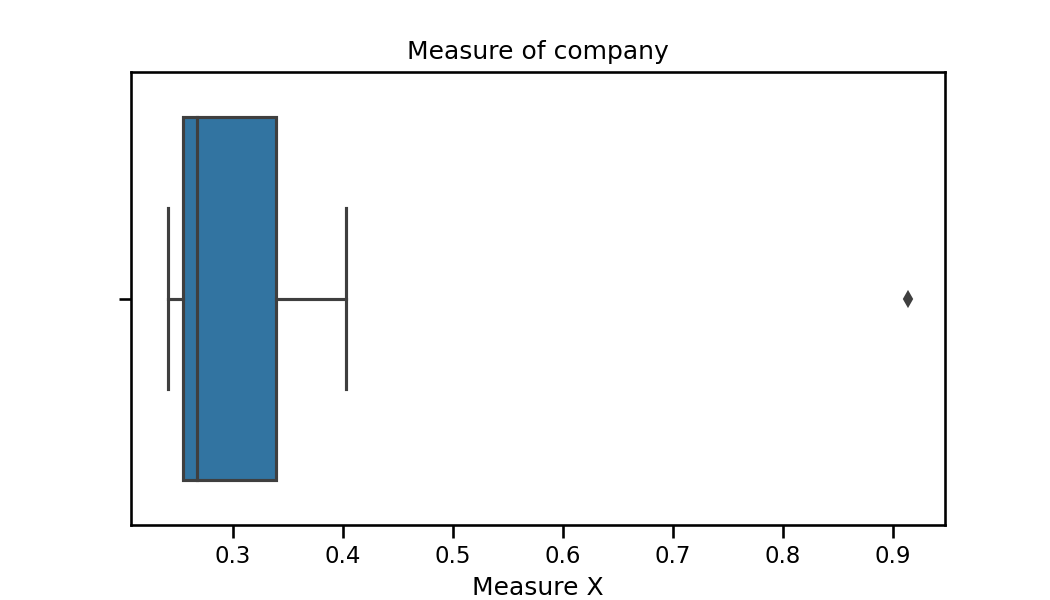

In [5]:
fig,ax = plt.subplots()
ax = sns.boxplot(company_names['Measure X'])
plt.title('Measure of company')
plt.show()

<IPython.core.display.Javascript object>


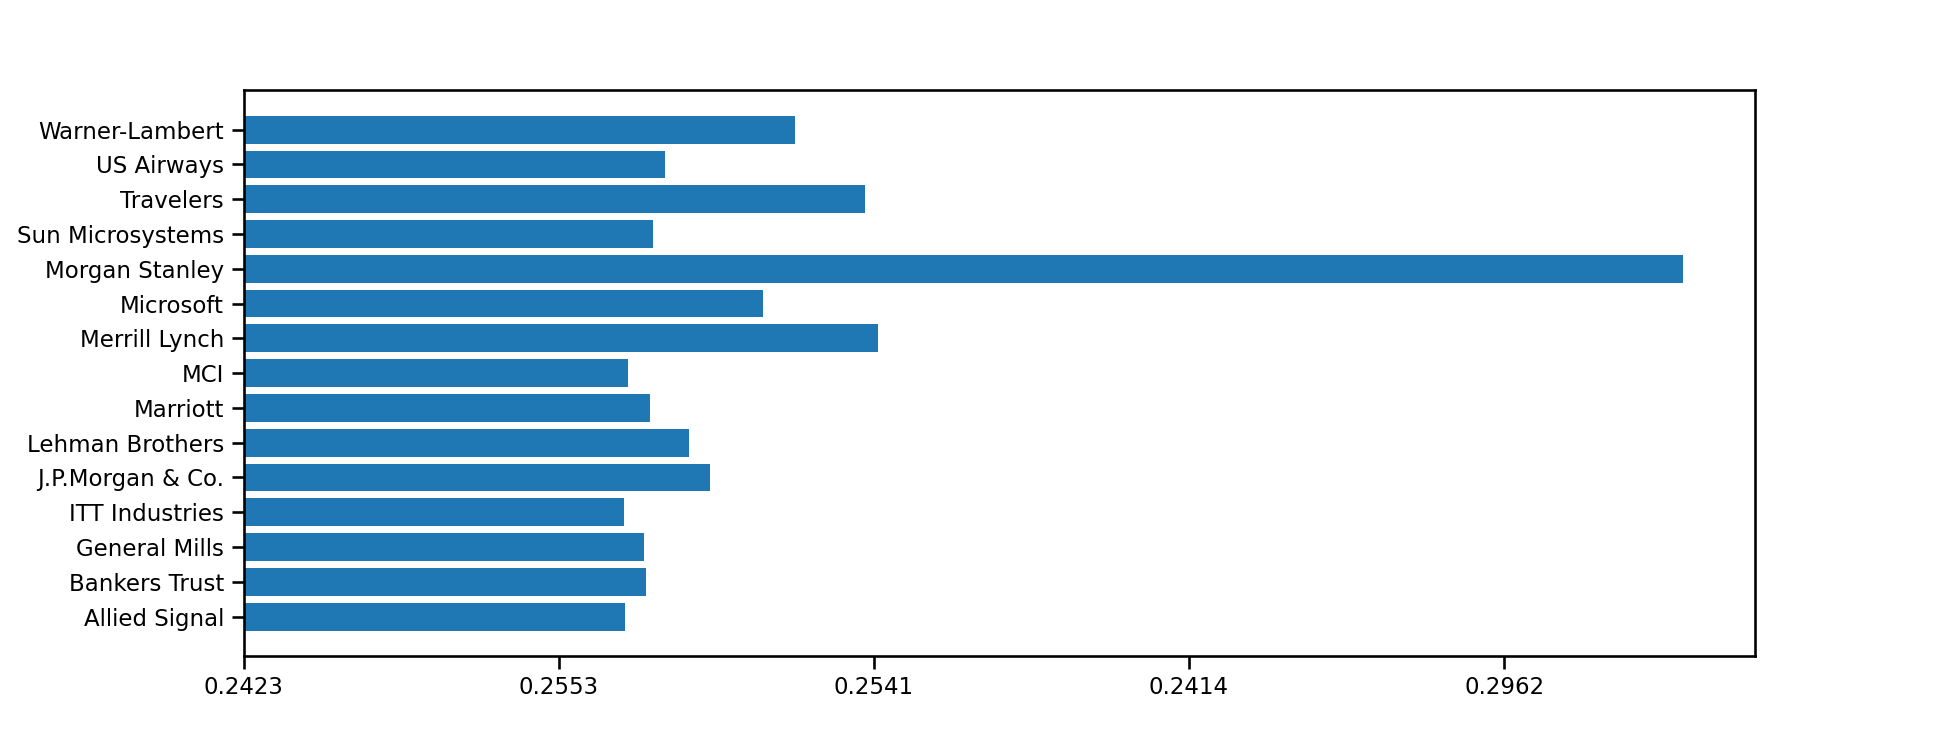

In [6]:
fig,ax = plt.subplots(figsize=(13,5))
ax.barh(company_names['Name of company'],company_names['Measure X'])
# Ref: https://github.com/MUbarak123-56/DataBEL/blob/master/BAR%20CHART%20TUTORIAL.ipynb
ax.set_xticklabels(company_names['Measure X']) 
plt.show()


In [7]:
company_names.describe().T

,count,mean,std,min,25%,50%,75%,max
Measure X,15.0,0.332713,0.169454,0.2414,0.2547,0.2671,0.33975,0.9136


In [8]:
q1 = company_names['Measure X'].quantile(0.25)

In [9]:
q3 = company_names['Measure X'].quantile(0.75)

In [10]:
iqr = np.round((q3-q1),4)

In [11]:
low_outliers = company_names.loc[(company_names['Measure X']<(q1-1.5*iqr))]
high_outliers = company_names.loc[(company_names['Measure X']>(q3+1.5*iqr))] 

In [12]:
low_outliers

,Name of company,Measure X


In [13]:
high_outliers

,Name of company,Measure X
10,Morgan Stanley,0.9136


In [14]:
print("High outliers: \n",high_outliers)

High outliers: 
    Name of company  Measure X
10  Morgan Stanley     0.9136


In [15]:
print("No low outliers: \n")

No low outliers: 



In [16]:
print("Mean:{:.2f}%".format(company_names['Measure X'].mean()*100))
print("Variance:{:.2f} ".format(company_names['Measure X'].var()*10000))
print("Standard deviation:{:.2f}%".format(company_names['Measure X'].std()*100))

Mean:33.27%
Variance:287.15 
Standard deviation:16.95%


In [17]:
company_names.iloc[10, : ]

Name of company    Morgan Stanley
Measure X                  0.9136
Name: 10, dtype: object

In [18]:
filtered_companies = company_names.drop([10])

<IPython.core.display.Javascript object>


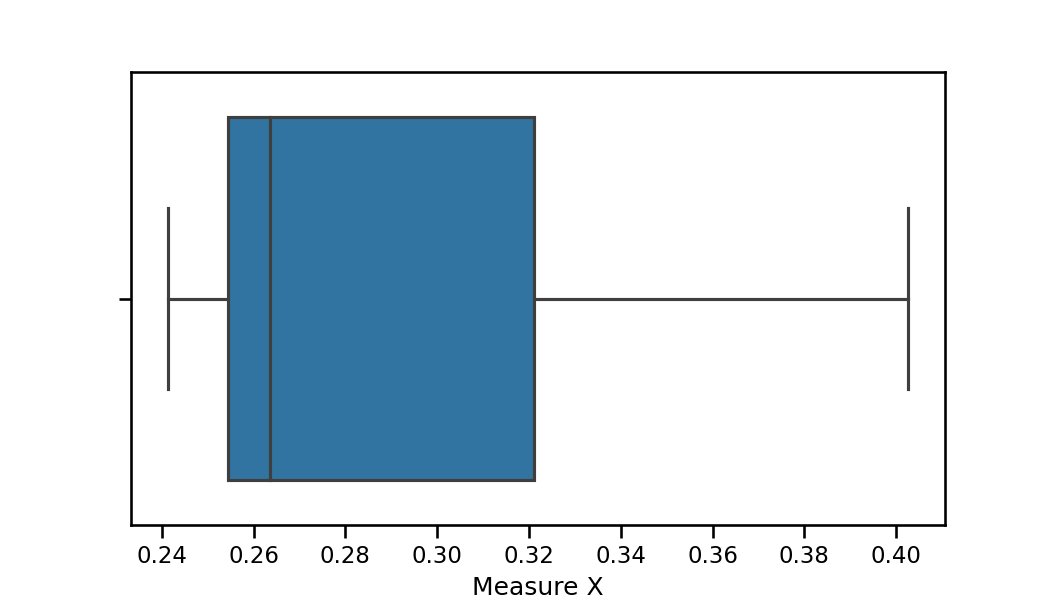

In [19]:
fig,ax = plt.subplots()
ax  = sns.boxplot(filtered_companies['Measure X'])
plt.show()